In [1]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Images Count 

In [2]:
def display_count(image_dir, mask_dir):
    image_count = len(os.listdir(image_dir))
    mask_count = len(os.listdir(mask_dir))
    
    print(f"Number of images: {image_count}")
    print(f"Number of masks: {mask_count}")

# Directories containing images and masks
image_dir = '.\Dataset\Image'
mask_dir = '.\Dataset\Mask'

# Display the count of images and masks
display_count(image_dir, mask_dir)

Number of images: 289
Number of masks: 289


### Display Random Images and Its masks

In [3]:
def plot_images_and_masks(image_paths, mask_paths):
    # Plot image and mask side by side
    plt.figure(figsize=(18, 12))
    
    for i, (image_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(3, 2, 2*i + 1)
        plt.title('Original Image')
        plt.imshow(image_rgb)
        plt.axis('off')
        
        plt.subplot(3, 2, 2*i + 2)
        plt.title('Mask')
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
    
    plt.show()

In [4]:
def plot_overlay(image_paths, mask_paths):
    # Plot overlay of image and mask
    plt.figure(figsize=(18, 12))
    
    for i, (image_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        overlay = image_rgb.copy()
        overlay[mask > 0] = (255, 0, 0)  # Red color for the mask
        
        plt.subplot(3, 1, i + 1)
        plt.title('Overlay')
        plt.imshow(overlay)
        plt.axis('off')
    
    plt.show()

def get_random_image_mask_pairs(image_dir, mask_dir, num_pairs=3):
    image_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)
    
    image_mask_pairs = list(zip(image_files, mask_files))
    random_pairs = random.sample(image_mask_pairs, num_pairs)
    
    image_paths = [os.path.join(image_dir, pair[0]) for pair in random_pairs]
    mask_paths = [os.path.join(mask_dir, pair[1]) for pair in random_pairs]
    
    return image_paths, mask_paths


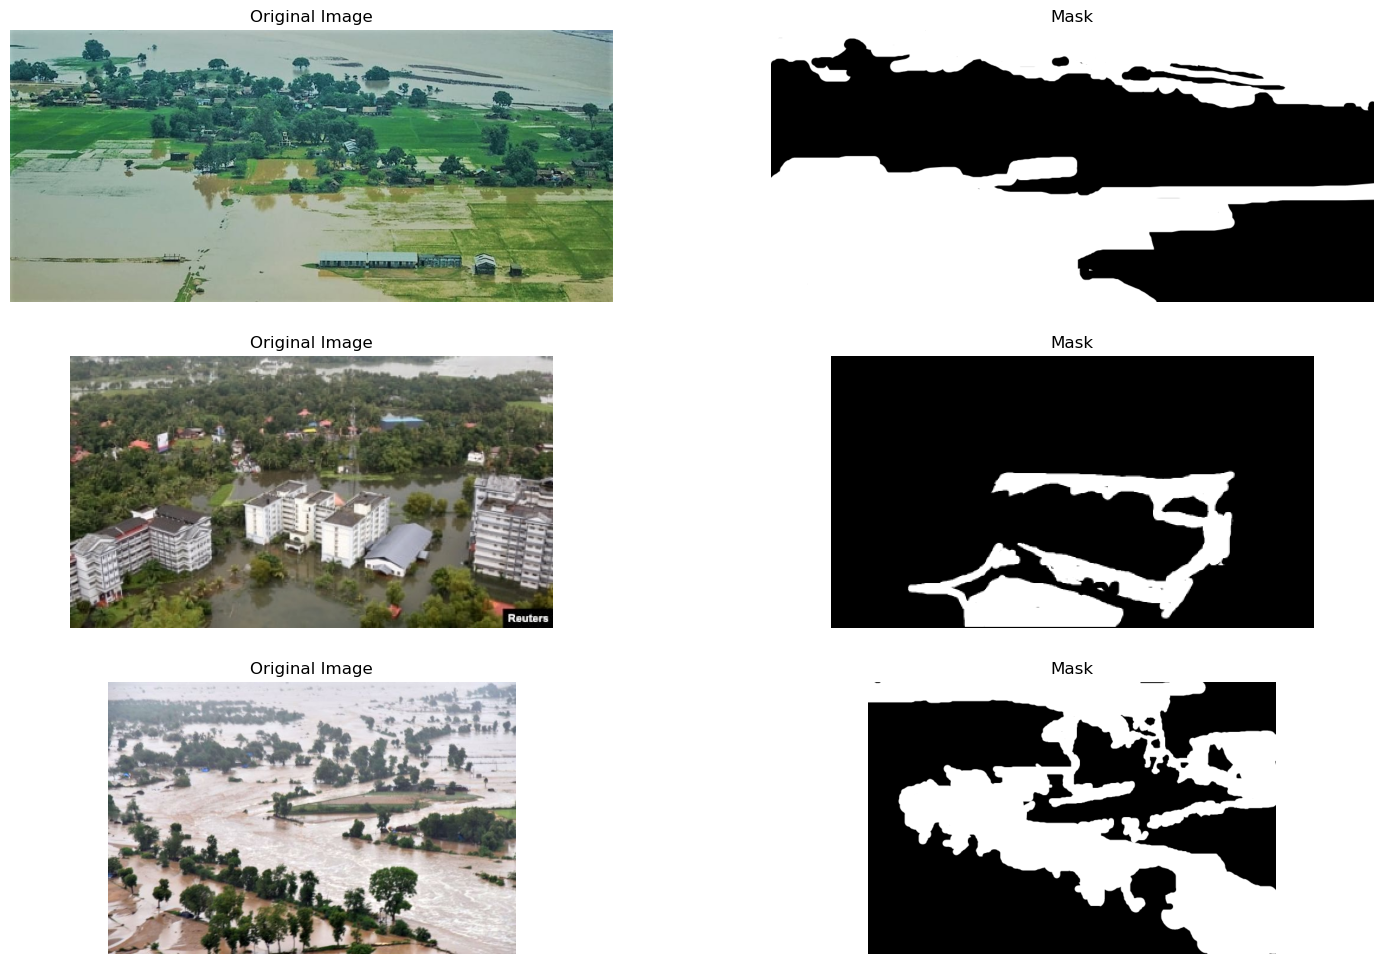

In [5]:
# Get random image-mask pairs
image_paths, mask_paths = get_random_image_mask_pairs(image_dir, mask_dir)

# Plot the images and masks
plot_images_and_masks(image_paths, mask_paths)


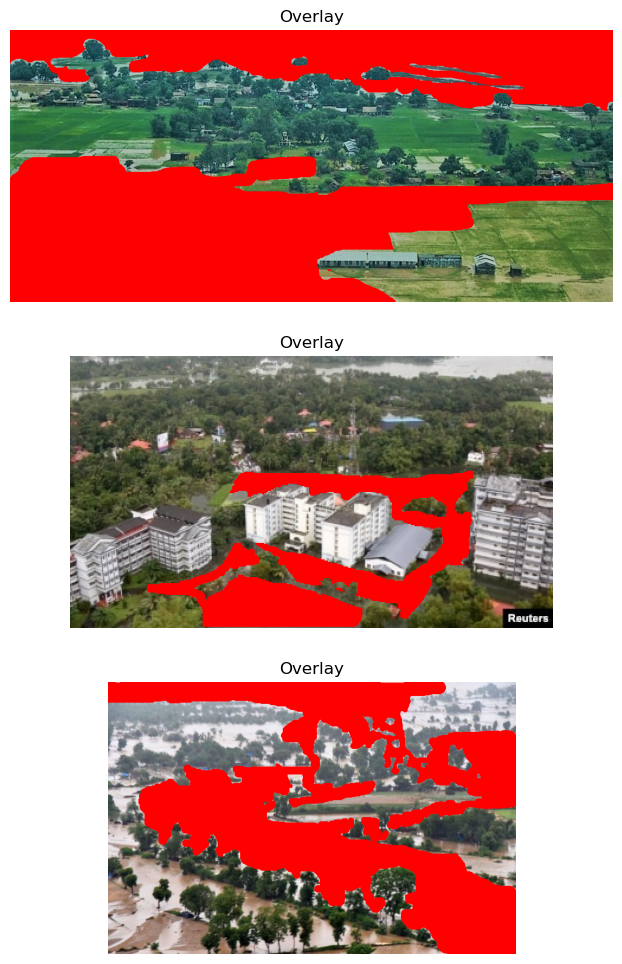

In [6]:
plot_overlay(image_paths, mask_paths)

### EDA to Display Images Dimensions and Mask Coverage

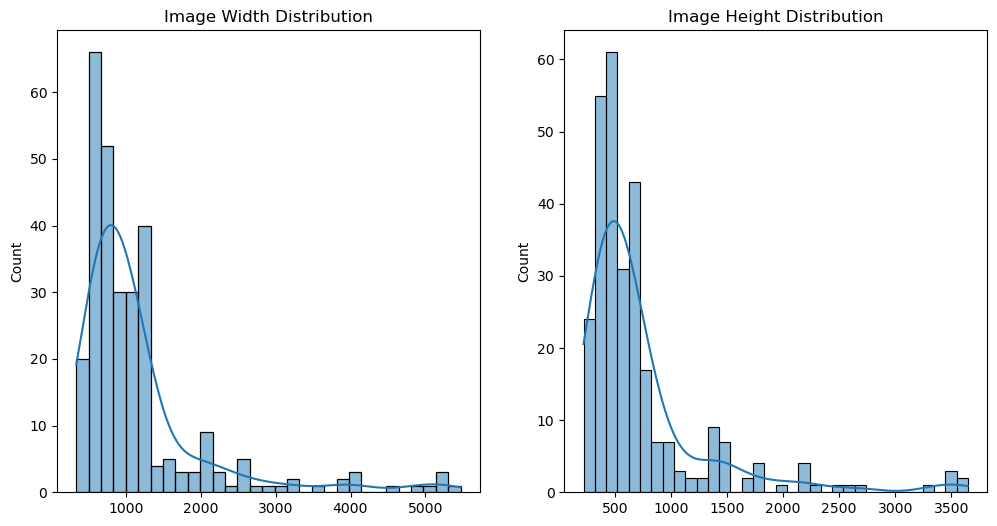

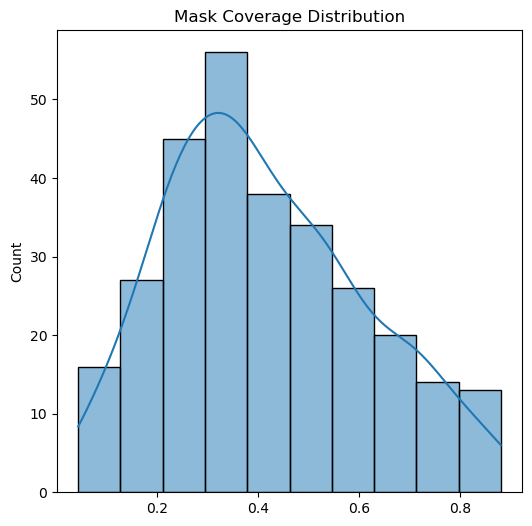

In [7]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Directories containing images and masks
image_dir = '.\\Dataset\\Image'
mask_dir = '.\\Dataset\\Mask'

# Get list of images and masks
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

# Initialize lists for image dimensions and mask coverage
image_dimensions = []
mask_coverage = []

# Analyze each image and mask
for image_file, mask_file in zip(image_files, mask_files):
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, mask_file)
    
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error reading image: {image_path}")
        continue
    if mask is None:
        print(f"Error reading mask: {mask_path}")
        continue
    
    # Append image dimensions
    image_dimensions.append(image.shape[:2])
    
    # Calculate mask coverage
    mask_coverage.append(np.sum(mask > 0) / mask.size)

# Convert lists to arrays for easy analysis
image_dimensions = np.array(image_dimensions)
mask_coverage = np.array(mask_coverage)

# Plot image dimensions distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image Width Distribution')
sns.histplot(image_dimensions[:, 1], kde=True)
plt.subplot(1, 2, 2)
plt.title('Image Height Distribution')
sns.histplot(image_dimensions[:, 0], kde=True)
plt.show()

# Plot mask coverage distribution
plt.figure(figsize=(6, 6))
plt.title('Mask Coverage Distribution')
sns.histplot(mask_coverage, kde=True)
plt.show()

### EDA: Distribution of Pixel intensity

In [ ]:
image_intensities = []
mask_intensities = []

# Analyze each image and mask
for image_file, mask_file in zip(image_files, mask_files):
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, mask_file)
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale for intensity analysis
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error reading image: {image_path}")
        continue
    if mask is None:
        print(f"Error reading mask: {mask_path}")
        continue
    
    # Append pixel intensities
    image_intensities.extend(image.flatten())
    mask_intensities.extend(mask.flatten())

# Convert lists to arrays for easy analysis
image_intensities = np.array(image_intensities)
mask_intensities = np.array(mask_intensities)

# Plot pixel intensity distribution for images
plt.figure(figsize=(12, 6))
plt.title('Pixel Intensity Distribution in Images')
sns.histplot(image_intensities, bins=256, kde=True)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Plot pixel intensity distribution for masks
plt.figure(figsize=(12, 6))
plt.title('Pixel Intensity Distribution in Masks')
sns.histplot(mask_intensities, bins=256, kde=True)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### Data Preprocessing: Total Variation Denoising 

C:\Users\ppt59\AppData\Local\Temp\ipykernel_4440\3752158514.py:25: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(image, weight=0.1, multichannel=True)


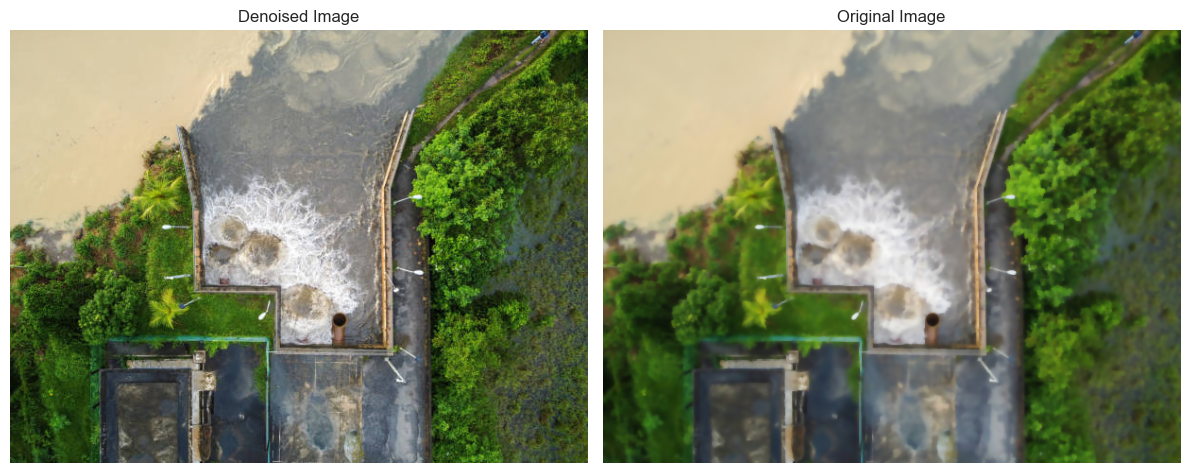

In [57]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle

# Directory containing images
image_dir = './Dataset/Image'

# Get list of images
image_files = os.listdir(image_dir)

# Select a random image file
random_image_file = random.choice(image_files)
image_path = os.path.join(image_dir, random_image_file)

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

if image is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")

# Perform Total Variation denoising
denoised_image = denoise_tv_chambolle(image, weight=0.1, multichannel=True)

# Display original and denoised images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Denoised Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(denoised_image)
plt.axis('off')

plt.tight_layout()
plt.show()

### Data Preprocessing : Applying and saving it in folder

In [58]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle
from tqdm import tqdm

# Directory containing original images
original_image_dir = './Dataset/Image'

# Directory to save preprocessed (denoised) images
preprocessed_image_dir = './Dataset/Preprocessed'

# Create the directory if it doesn't exist
os.makedirs(preprocessed_image_dir, exist_ok=True)

# Get list of images
image_files = os.listdir(original_image_dir)

# Define denoising parameters
denoising_weight = 0.1

# Iterate through each image and denoise
for image_file in tqdm(image_files, desc='Processing Images'):
    # Construct paths
    image_path = os.path.join(original_image_dir, image_file)
    save_path = os.path.join(preprocessed_image_dir, image_file)
    
    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error reading image: {image_path}")
        continue
    
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform Total Variation denoising
    denoised_image = denoise_tv_chambolle(image, weight=denoising_weight, multichannel=True)
    
    # Convert denoised image from float to uint8
    denoised_image = (denoised_image * 255).astype(np.uint8)
    
    # Convert RGB back to BGR for OpenCV saving
    denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2BGR)
    
    # Save denoised image
    cv2.imwrite(save_path, denoised_image)

print("Preprocessing completed.")


Processing Images:   0%|                                                                       | 0/289 [00:00<?, ?it/s]C:\Users\ppt59\AppData\Local\Temp\ipykernel_4440\3178246653.py:41: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(image, weight=denoising_weight, multichannel=True)
Processing Images: 100%|█████████████████████████████████████████████████████████████| 289/289 [23:03<00:00,  4.79s/it]

Preprocessing completed.


### Trying Unet Model and checking it data preprocessing its effective or not

#### Without Preprocessing

In [38]:
import os
import pandas as pd

image_dir = r"./Dataset/Image/"
mask_dir = r"./Dataset/Mask/"

image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])

paths = pd.DataFrame({
    "input": image_files,
    "target": mask_files
})
print(paths)

                        input                   target
0       ./Dataset/Image/1.jpg     ./Dataset/Mask/1.png
1      ./Dataset/Image/10.jpg    ./Dataset/Mask/10.png
2    ./Dataset/Image/1000.jpg  ./Dataset/Mask/1000.png
3    ./Dataset/Image/1001.jpg  ./Dataset/Mask/1001.png
4    ./Dataset/Image/1002.jpg  ./Dataset/Mask/1002.png
..                        ...                      ...
284     ./Dataset/Image/5.jpg     ./Dataset/Mask/5.png
285     ./Dataset/Image/6.jpg     ./Dataset/Mask/6.png
286     ./Dataset/Image/7.jpg     ./Dataset/Mask/7.png
287     ./Dataset/Image/8.jpg     ./Dataset/Mask/8.png
288     ./Dataset/Image/9.jpg     ./Dataset/Mask/9.png

[289 rows x 2 columns]


In [47]:
def read_image_and_mask(file_path, is_mask = False):
    try:
        image = tf.io.read_file(file_path)
        if is_mask:
            image = tf.image.decode_png(image, channels=1)
        else:
            image = tf.image.decode_jpeg(image, channels=3)
        
        image = tf.image.resize(image, [128, 128])
        image = tf.image.convert_image_dtype(image, tf.float32)
        
    except tf.errors.InvalidArgumentError as e:
        # Print out the file path causing the error
        tf.print(f"Error reading file: {file_path}")
        raise e
    return image/255

In [48]:
def create_dataset_from_dataframe(dataframe):
    dataset = tf.data.Dataset.from_tensor_slices((dataframe['input'], dataframe['target']))
    dataset = dataset.map(lambda x, y: (read_image_and_mask(x, is_mask=False), read_image_and_mask(y, is_mask=True)), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.cache()
    dataset = dataset.shuffle(buffer_size=len(dataframe)) 
    dataset = dataset.batch(16)
    return dataset

In [49]:
from pathlib import Path
import imghdr

image_extensions = [".png", ".jpg"]
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
rows_to_delete = []

for index, row in paths.iterrows():
    filepath = Path(row['input'])
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            rows_to_delete.append(index)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            rows_to_delete.append(index)

In [50]:
paths = paths.drop(rows_to_delete).reset_index()
len(paths)

232

In [51]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
train_df, remaining_df = train_test_split(paths, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

train_dataset = create_dataset_from_dataframe(train_df)
val_dataset = create_dataset_from_dataframe(val_df)
test_dataset = create_dataset_from_dataframe(test_df)

In [52]:
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from tensorflow import keras
model = sm.Unet('efficientnetb2', 
                input_shape = (128,128,3), 
                classes = 1, 
                activation='sigmoid', 
                encoder_weights='imagenet')
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 2e-5),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [iou_score],
)

history = model.fit(train_dataset, validation_data = val_dataset, 
                    epochs = 50)

Epoch 1/50
11/11 [==============================] - 27s 913ms/step - loss: 0.6772 - iou_score: 0.2543 - val_loss: 0.8600 - val_iou_score: 0.1754
Epoch 2/50
11/11 [==============================] - 3s 240ms/step - loss: 0.6386 - iou_score: 0.2786 - val_loss: 0.8049 - val_iou_score: 0.1875
Epoch 3/50
11/11 [==============================] - 3s 241ms/step - loss: 0.6102 - iou_score: 0.2950 - val_loss: 0.7410 - val_iou_score: 0.2253
Epoch 4/50
11/11 [==============================] - 3s 242ms/step - loss: 0.5874 - iou_score: 0.2977 - val_loss: 0.6805 - val_iou_score: 0.2623
Epoch 5/50
11/11 [==============================] - 3s 238ms/step - loss: 0.5682 - iou_score: 0.3175 - val_loss: 0.6310 - val_iou_score: 0.2941
Epoch 6/50
11/11 [==============================] - 3s 242ms/step - loss: 0.5510 - iou_score: 0.3246 - val_loss: 0.5960 - val_iou_score: 0.3077
Epoch 7/50
11/11 [==============================] - 3s 240ms/step - loss: 0.5314 - iou_score: 0.3412 - val_loss: 0.5719 - val_iou_score

C:\Users\ppt59\AppData\Local\Temp\ipykernel_4440\3640412839.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


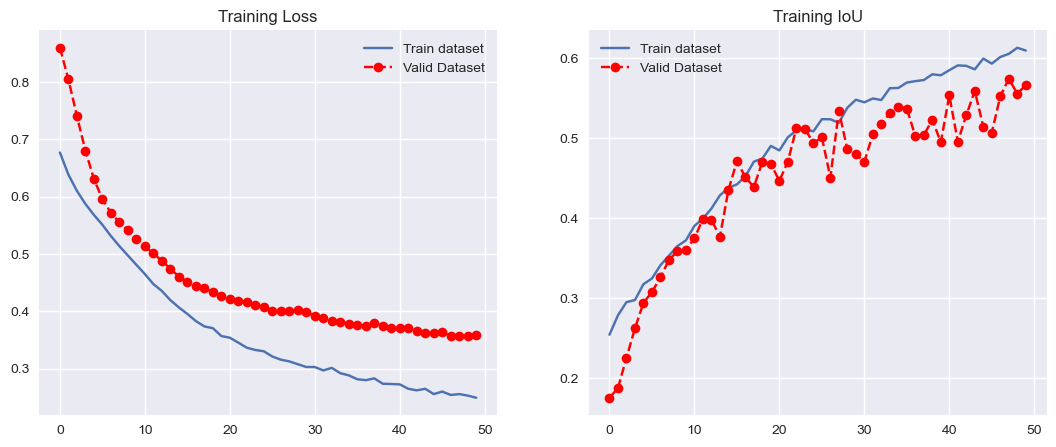

In [53]:
plt.style.use('seaborn')

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.title('Training Loss')
plt.plot(history.history['loss'], label = 'Train dataset')
plt.plot(history.history['val_loss'], '--r', marker = 'o', label = 'Valid Dataset')
plt.legend()

plt.subplot(1,2,2)
plt.title('Training IoU')
plt.plot(history.history['iou_score'], label = 'Train dataset')
plt.plot(history.history['val_iou_score'], '--r', marker = 'o', label = 'Valid Dataset')
plt.legend()
plt.show()

In [54]:
model.evaluate(test_dataset)

3/3 [==============================] - 0s 53ms/step - loss: 0.3306 - iou_score: 0.5523


[0.3305763006210327, 0.5523409247398376]

### With preprocessing

In [63]:
image_dir = r"./Dataset/Image/"
mask_dir = r"./Dataset/Mask/"

image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])

paths = pd.DataFrame({
    "input": image_files,
    "target": mask_files
})
print(paths)

from pathlib import Path
import imghdr

image_extensions = [".png", ".jpg"]
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
rows_to_delete = []

for index, row in paths.iterrows():
    filepath = Path(row['input'])
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            rows_to_delete.append(index)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            rows_to_delete.append(index)
paths = paths.drop(rows_to_delete).reset_index()
len(paths)

                        input                   target
0       ./Dataset/Image/1.jpg     ./Dataset/Mask/1.png
1      ./Dataset/Image/10.jpg    ./Dataset/Mask/10.png
2    ./Dataset/Image/1000.jpg  ./Dataset/Mask/1000.png
3    ./Dataset/Image/1001.jpg  ./Dataset/Mask/1001.png
4    ./Dataset/Image/1002.jpg  ./Dataset/Mask/1002.png
..                        ...                      ...
284     ./Dataset/Image/5.jpg     ./Dataset/Mask/5.png
285     ./Dataset/Image/6.jpg     ./Dataset/Mask/6.png
286     ./Dataset/Image/7.jpg     ./Dataset/Mask/7.png
287     ./Dataset/Image/8.jpg     ./Dataset/Mask/8.png
288     ./Dataset/Image/9.jpg     ./Dataset/Mask/9.png

[289 rows x 2 columns]
Dataset\Image\1002.jpg is a webp, not accepted by TensorFlow
Dataset\Image\1009.jpg is a webp, not accepted by TensorFlow
Dataset\Image\1013.jpg is a webp, not accepted by TensorFlow
Dataset\Image\1015.jpg is a webp, not accepted by TensorFlow
Dataset\Image\1027.jpg is a webp, not accepted by TensorFlow
Dataset\Ima

232

In [64]:
train_df, remaining_df = train_test_split(paths, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

train_dataset = create_dataset_from_dataframe(train_df)
val_dataset = create_dataset_from_dataframe(val_df)
test_dataset = create_dataset_from_dataframe(test_df)

In [66]:
model = sm.Unet('efficientnetb2', 
                input_shape = (128,128,3), 
                classes = 1, 
                activation='sigmoid', 
                encoder_weights='imagenet')
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 2e-5),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [iou_score],
)

history = model.fit(train_dataset, validation_data = val_dataset, 
                    epochs = 50)

Epoch 1/50
11/11 [==============================] - 19s 466ms/step - loss: 0.7462 - iou_score: 0.3012 - val_loss: 0.6895 - val_iou_score: 0.2605
Epoch 2/50
11/11 [==============================] - 3s 238ms/step - loss: 0.6992 - iou_score: 0.3055 - val_loss: 0.6975 - val_iou_score: 0.2528
Epoch 3/50
11/11 [==============================] - 3s 244ms/step - loss: 0.6637 - iou_score: 0.3228 - val_loss: 0.7068 - val_iou_score: 0.2772
Epoch 4/50
11/11 [==============================] - 3s 240ms/step - loss: 0.6374 - iou_score: 0.3458 - val_loss: 0.7166 - val_iou_score: 0.2539
Epoch 5/50
11/11 [==============================] - 3s 244ms/step - loss: 0.6134 - iou_score: 0.3521 - val_loss: 0.7247 - val_iou_score: 0.2646
Epoch 6/50
11/11 [==============================] - 3s 239ms/step - loss: 0.5948 - iou_score: 0.3524 - val_loss: 0.7300 - val_iou_score: 0.2596
Epoch 7/50
11/11 [==============================] - 3s 243ms/step - loss: 0.5747 - iou_score: 0.3791 - val_loss: 0.7282 - val_iou_score

C:\Users\ppt59\AppData\Local\Temp\ipykernel_4440\3640412839.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


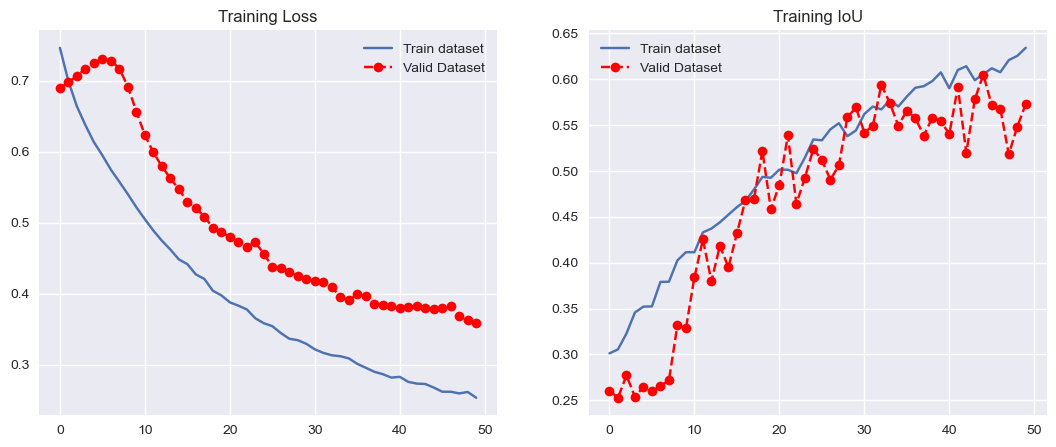

In [67]:
plt.style.use('seaborn')

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.title('Training Loss')
plt.plot(history.history['loss'], label = 'Train dataset')
plt.plot(history.history['val_loss'], '--r', marker = 'o', label = 'Valid Dataset')
plt.legend()

plt.subplot(1,2,2)
plt.title('Training IoU')
plt.plot(history.history['iou_score'], label = 'Train dataset')
plt.plot(history.history['val_iou_score'], '--r', marker = 'o', label = 'Valid Dataset')
plt.legend()
plt.show()

In [68]:
model.evaluate(test_dataset)

3/3 [==============================] - 0s 57ms/step - loss: 0.3353 - iou_score: 0.6072


[0.33531686663627625, 0.6072084307670593]